# VIX Time Series

Loading Libraries

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot

%matplotlib inline

Load Data

In [ ]:
#Load dataframe
df = pd.read_csv("/content/VIX.csv", index_col = 'Date', parse_dates = True)

Data Exploration and Preprocessing

In [ ]:
#Data exploration
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-01,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-03-01,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-04-01,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-05-01,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-08-01,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [ ]:
df = df.loc['2004':] #Select 2004 onwards due to calculation changes in VIX

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0
mean,19.030563,19.962099,18.102987,18.916391,18.916391,0.0
std,9.165392,9.852950,8.446091,9.117493,9.117493,0.0
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0
25%,13.232500,13.760000,12.752500,13.160000,13.160000,0.0
50%,16.185001,16.900000,15.460000,16.090000,16.090000,0.0
75%,21.925000,22.997500,20.870001,21.637499,21.637499,0.0
max,82.690002,89.529999,72.760002,82.690002,82.690002,0.0


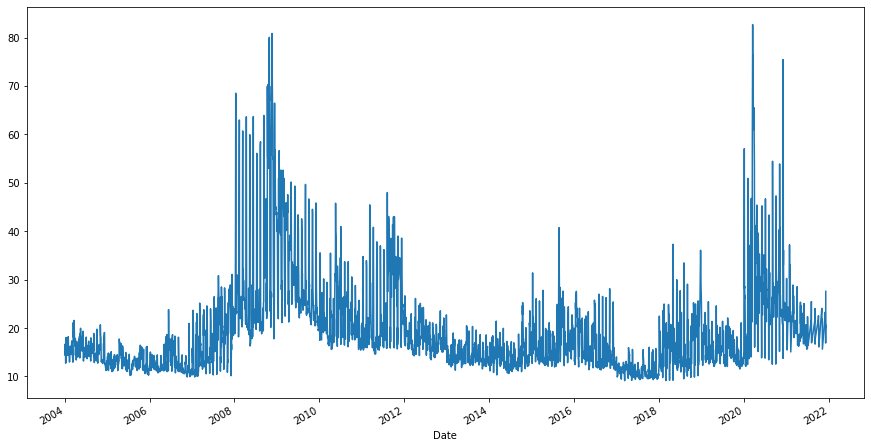

In [ ]:
df ['Adj Close'].plot(figsize = (15,8))

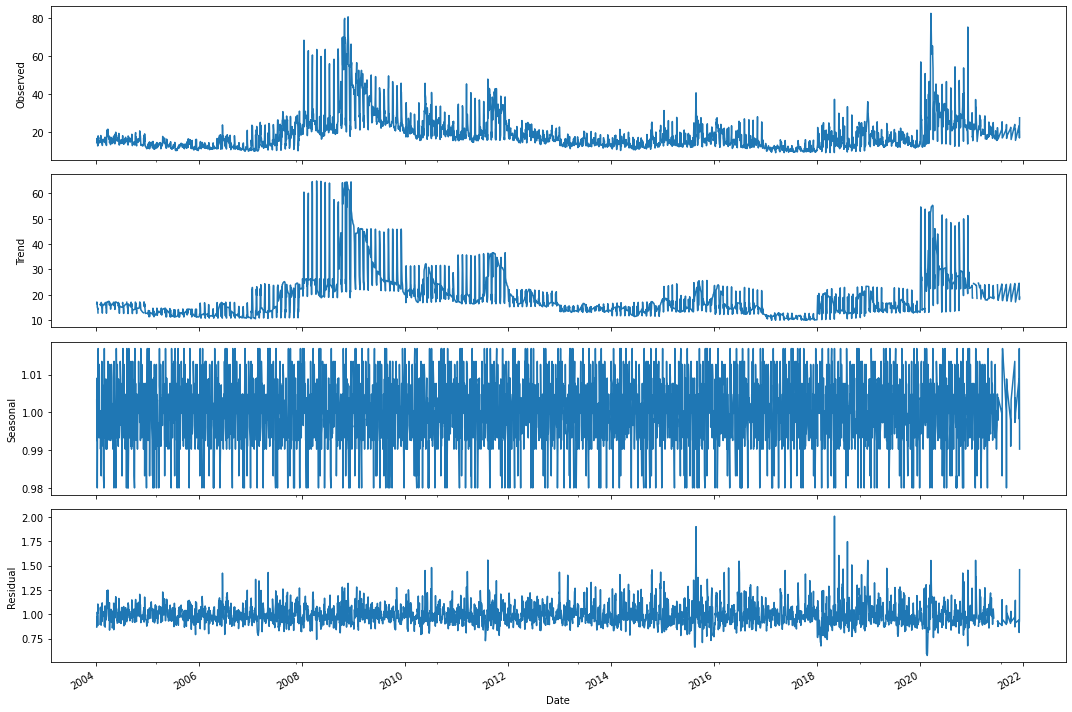

In [ ]:
#Observing Time Series Components

plt.rcParams['figure.figsize'] = (15,10)
components = seasonal_decompose(df ['Adj Close'], model='mul', freq = 30)
components.plot();

In [ ]:
df.plot(figsize = (30,10))
df_rolling.plot(figsize = (30,10), color = 'red')

In [ ]:
#Statistical stationary Test

vix_adf = adfuller(vix['AdjClose'])

In [ ]:
#Null: It is non stationary
#Alt: It is stationary

def adfuller_test(AdjClose):
    result = adfuller(AdjClose)
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Time Series has no unit root and is stationary")
    else:
        print("Time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(vix['AdjClose'])


Establishing Baseline Model

In [ ]:
#Persistence Algorithm (Naive forecast)

baseline = pd.DataFrame(vix_ts) #created 'baseline' as 'df_ts'(numpy.ndarray type) does not contain 'shift' function

In [ ]:
#Create laggard dataset (t+1)

vix_laggard = pd.concat([baseline, baseline.shift(1)], axis = 1)

In [ ]:
vix_laggard.head()

In [ ]:
vix_laggard.columns = ['Actual', 'Lag']

In [ ]:
vix_laggard.head()

In [ ]:
vix_test = vix_laggard[1:]

In [ ]:
vix_test.head()

In [ ]:
vix_test.tail()

In [ ]:
vix_mse = mean_squared_error(vix_test.Actual, vix_test.Lag)

In [ ]:
vix_mse

In [ ]:
np.sqrt(vix_mse)

ARIMA (p,d,q) Model

In [ ]:
#Stationary Test

test_result=adfuller(vix['AdjClose'])

In [ ]:
#Autocorrelation
#plot acf is to identify parameter q

plot_acf(vix)

In [ ]:
#Partial Autocorrelation
plot_pacf(vix)

In [ ]:
#Splitting into test and training set

vix.size

In [ ]:
vix_train = vix[0:5500]
vix_test = vix[5500:7938]

In [ ]:
vix_train.size

In [ ]:
vix_test.size

In [ ]:
vix_arima = ARIMA (vix_train, order = (4,0,2))

In [ ]:
vix_arima_fit = vix_arima.fit()

In [ ]:
vix_arima_fit.aic

In [ ]:
vix_forecast = vix_arima_fit.forecast(steps = 2438)[0]

In [ ]:
vix_forecast

In [ ]:
vix_test

In [ ]:
np.sqrt(mean_squared_error(vix_test, vix_forecast))